In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


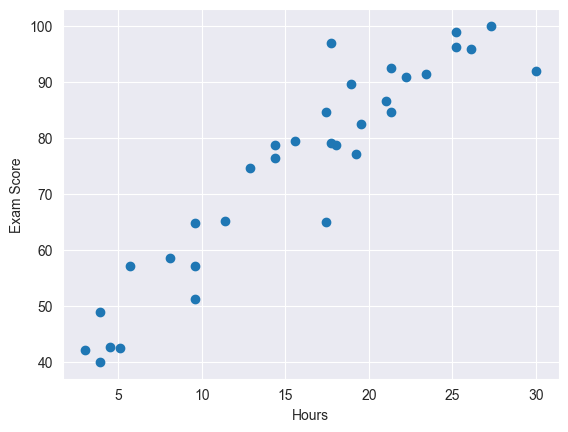

In [5]:
plt.scatter(df["Study Hours"], df["Exam Score"])
plt.xlabel("Hours")
plt.ylabel("Exam Score")
plt.show()

In [6]:
#independent and dependent
#birden fazla girdimiz olur diye X i df olarak vermemizi istiyor o yüzden bu şekilde yazarız.
X = df[["Study Hours"]]
y = df["Exam Score"]

In [7]:
type(X)

pandas.core.frame.DataFrame

In [8]:
type(y)

pandas.core.series.Series

test - train split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=15)

Standardize the data set

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print("Coefficients: \n", regression.coef_)
print("Intercept: \n", regression.intercept_)

Coefficients: 
 [16.17860223]
Intercept: 
 76.9076923076923


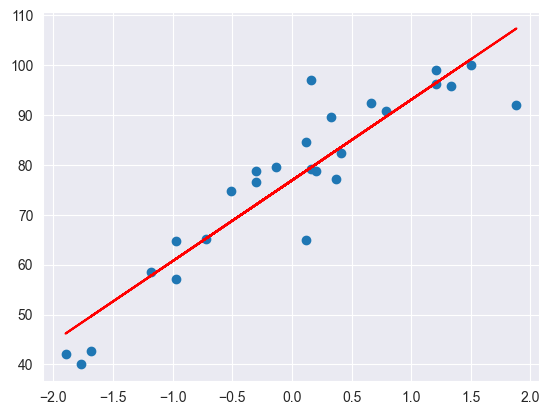

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [21]:
regression.predict([[20]])

array([400.47973694])

In [22]:
scaler.transform([[20]])

C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [23]:
regression.predict(scaler.transform([[20]]))
#20 saat çalışan biri 84 alır tahmini

C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [25]:
regression.predict(scaler.transform([[7]]))


C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([55.25566519])

prediction with test data

In [26]:
regression.predict(X_test)

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [27]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [28]:
regression.predict(X_test)
y_pred_test = regression.predict(X_test)

In [31]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
mse = mean_squared_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("Mean Squared Error: ",mse)
print("R2 Score: ",r2)
print("Mean Absolute Error: ",mae)
print("rmse: ",rmse)

Mean Squared Error:  29.45839048833392
R2 Score:  0.9196596206825491
Mean Absolute Error:  4.054868128856142
rmse:  5.427558427906043
